In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
#from wordcloud import WordCloud

In [3]:
# Read data
plants_df = pd.read_csv('../data/transformed_data.csv')

In [ ]:
# List all columns vertically
for column_name in plants_df.columns:
    print(column_name)

## Summary Statistics

In [ ]:
long_cols = []
small_cols = []

for column in plants_df.columns:
    # Assuming column is the column with text data
    text_column = plants_df[column]

    # Calculate the total number of entries
    total_entries = len(text_column)

    # Calculate the number of non-empty entries
    non_empty_entries = text_column.count()

    # Tokenize the text into words and calculate word counts
    def count_words(text):
        if pd.notna(text):
            return len(text.split())
        else:
            return 0

    word_counts = text_column.apply(count_words)

    # Calculate average word count
    average_word_count = word_counts.mean()        

    # Calculate standard deviation of word counts
    std_word_count = word_counts.std()

    if average_word_count > 1 and std_word_count > 2:
        long_cols.append(column)
    elif average_word_count <= 1 and std_word_count > 5:
        long_cols.append(column)
    else:
        small_cols.append(column)


    # Print the summary statistics
    print(f'Summary Statistics for "{column}" column:')
    print(f'- Number of non-empty entries: {non_empty_entries}')
    print(f'- Average word count: {average_word_count:.2f}')
    print(f'- Standard deviation of word counts: {std_word_count:.2f}')
    print()  # Add a newline between columns



Summary Statistics for "Name" column:
- Number of non-empty entries: 403
- Average word count: 1.68
- Standard deviation of word counts: 0.48

Summary Statistics for "Kingdom" column:
- Number of non-empty entries: 384
- Average word count: 0.95
- Standard deviation of word counts: 0.21

Summary Statistics for "Clade" column:
- Number of non-empty entries: 383
- Average word count: 0.95
- Standard deviation of word counts: 0.22

Summary Statistics for "Clade_2" column:
- Number of non-empty entries: 372
- Average word count: 0.92
- Standard deviation of word counts: 0.27

Summary Statistics for "Clade_3" column:
- Number of non-empty entries: 366
- Average word count: 0.91
- Standard deviation of word counts: 0.29

Summary Statistics for "Clade_4" column:
- Number of non-empty entries: 290
- Average word count: 0.72
- Standard deviation of word counts: 0.45

Summary Statistics for "Order" column:
- Number of non-empty entries: 384
- Average word count: 0.95
- Standard deviation of word

### Specific features

In [ ]:
print(small_cols)

['Name', 'Kingdom', 'Clade', 'Clade_2', 'Clade_3', 'Clade_4', 'Order', 'Family', 'Subfamily', 'Clade_5', 'Genus', 'Species', 'Section', 'Tribe', 'Subgenus', 'Subtribe', 'Division', 'Class']


### Long text columns

In [ ]:
print(long_cols)

['Introduction', 'Taxonomy', 'Ecology', 'Toxicity', 'Description', 'Uses', 'Habitat', 'Genetics', 'Etymology', 'Culinary uses', 'Allergenicity', 'Characteristics', 'Medicine', 'Cultivation and Uses', 'Nutrition', 'Chemistry and Composition', 'Threats and Control', 'Origin Country']


---

## Histogram Plots

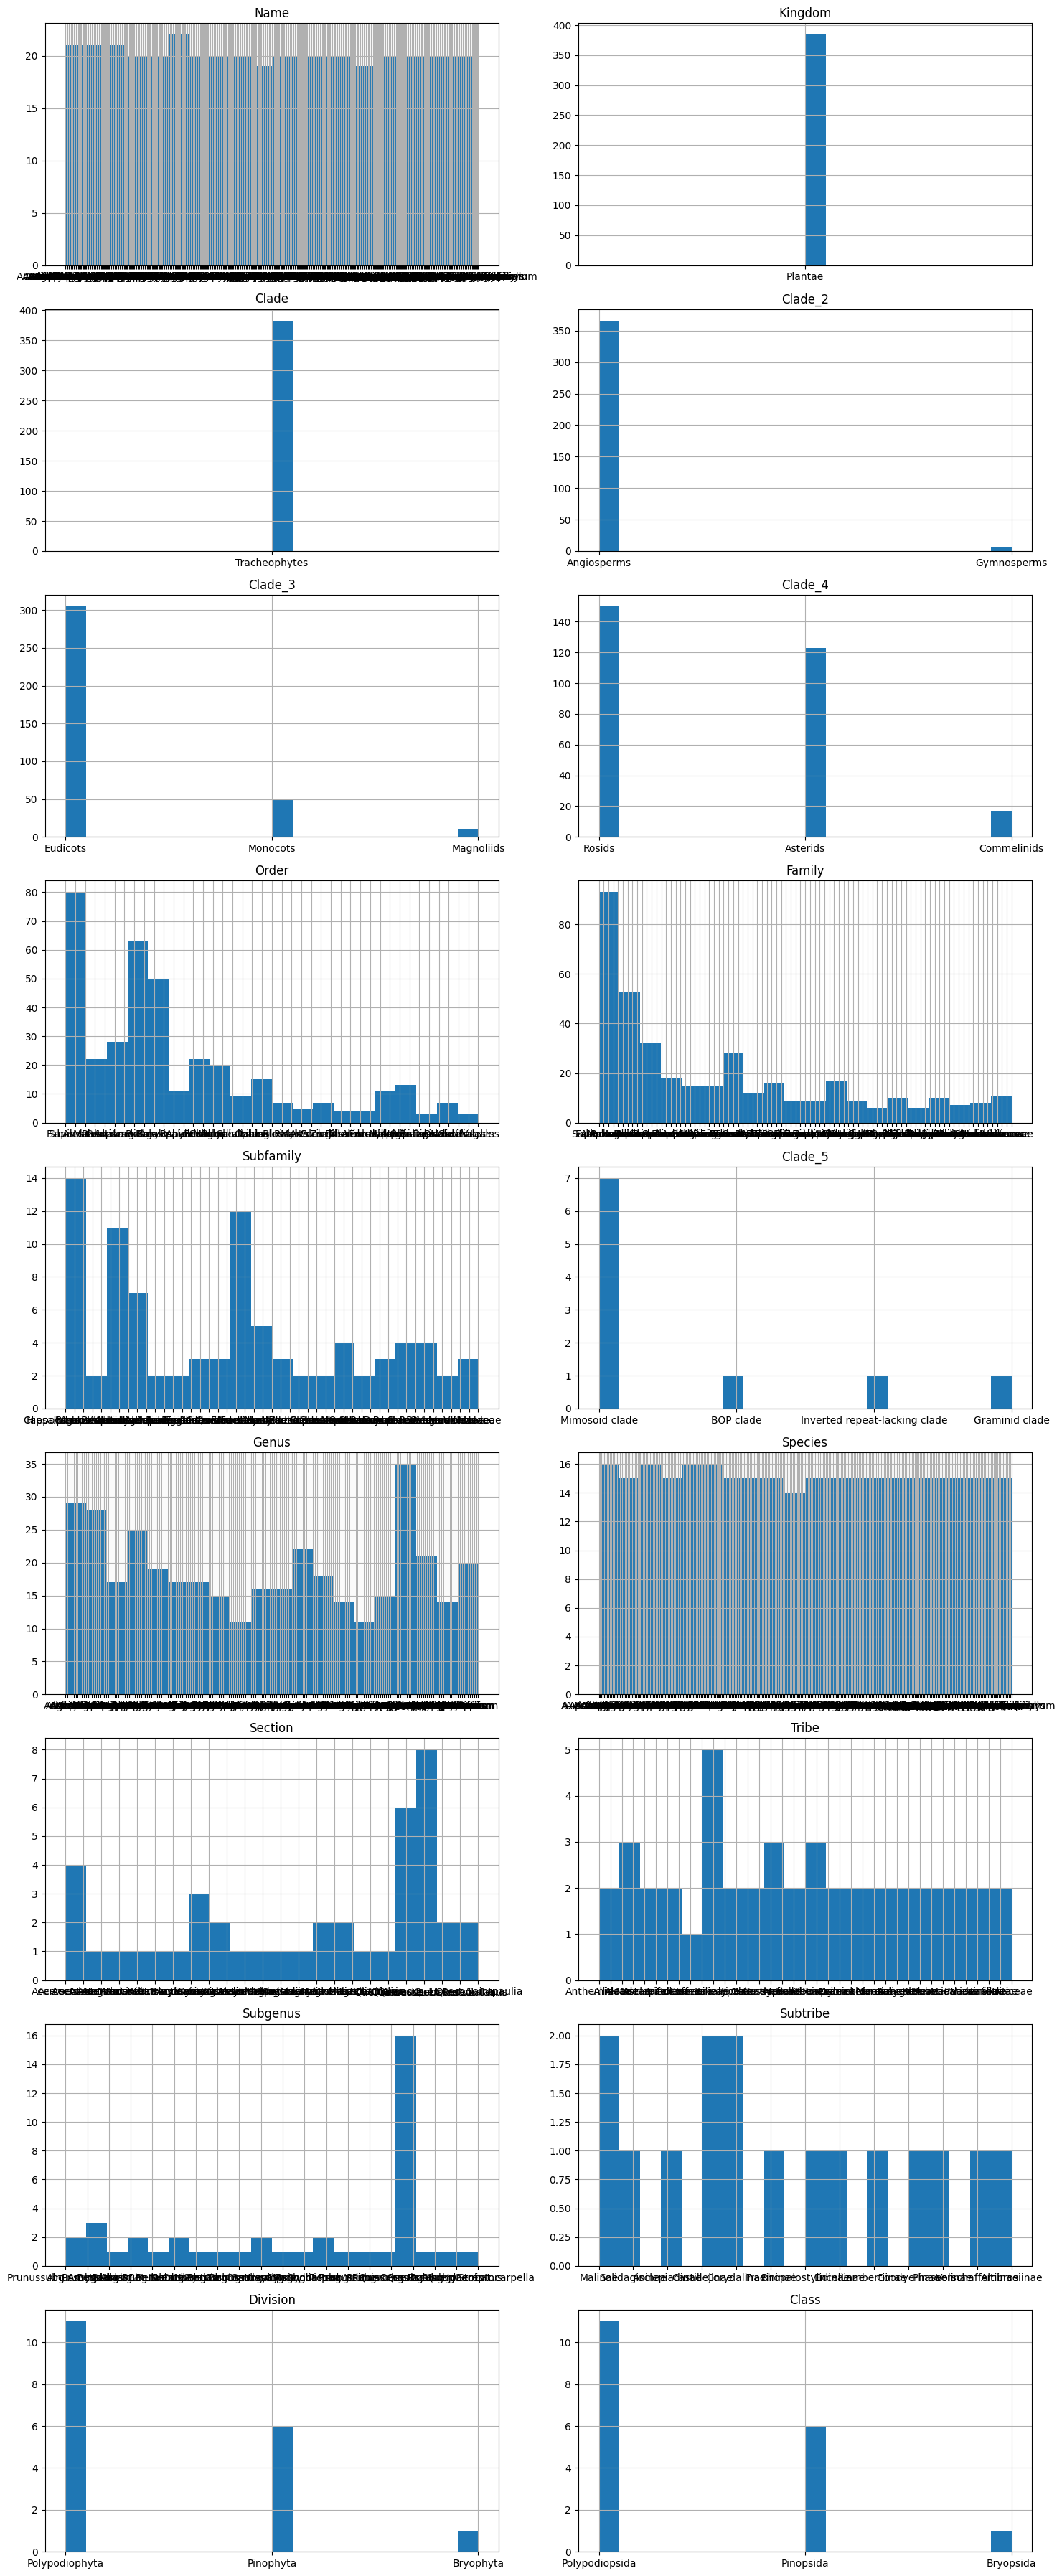

In [ ]:
# Calculate the number of rows and columns for subplots
num_features = len(small_cols)
num_cols = 2  # Adjust the number of columns as needed
num_rows = (num_features + num_cols - 1) // num_cols

# Create a figure and an array of subplots
fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, 4 * num_rows))

# Flatten the axs array if it has more than 1 row
axs = axs.flatten()

# Plot histograms for each feature
for i, feature in enumerate(small_cols):
    if i < num_features:
        ax = axs[i]
        plants_df[feature].hist(ax=ax, bins=20)  # Adjust the number of bins as needed
        ax.set_title(feature)
        ax.grid(True)
    else:
        axs[i].axis('off')

# Hide any empty subplots
for i in range(num_features, num_rows * num_cols):
    axs[i].axis('off')

# Adjust layout
plt.tight_layout()

# Specify the directory and file name
directory = '../img/'
file_name = f'H_subplots.png'

# Save the plot to the specified directory with the specified name
plt.savefig(f'{directory}/{file_name}')

# Display the plot
plt.show()


## Boxplot of Word Counts

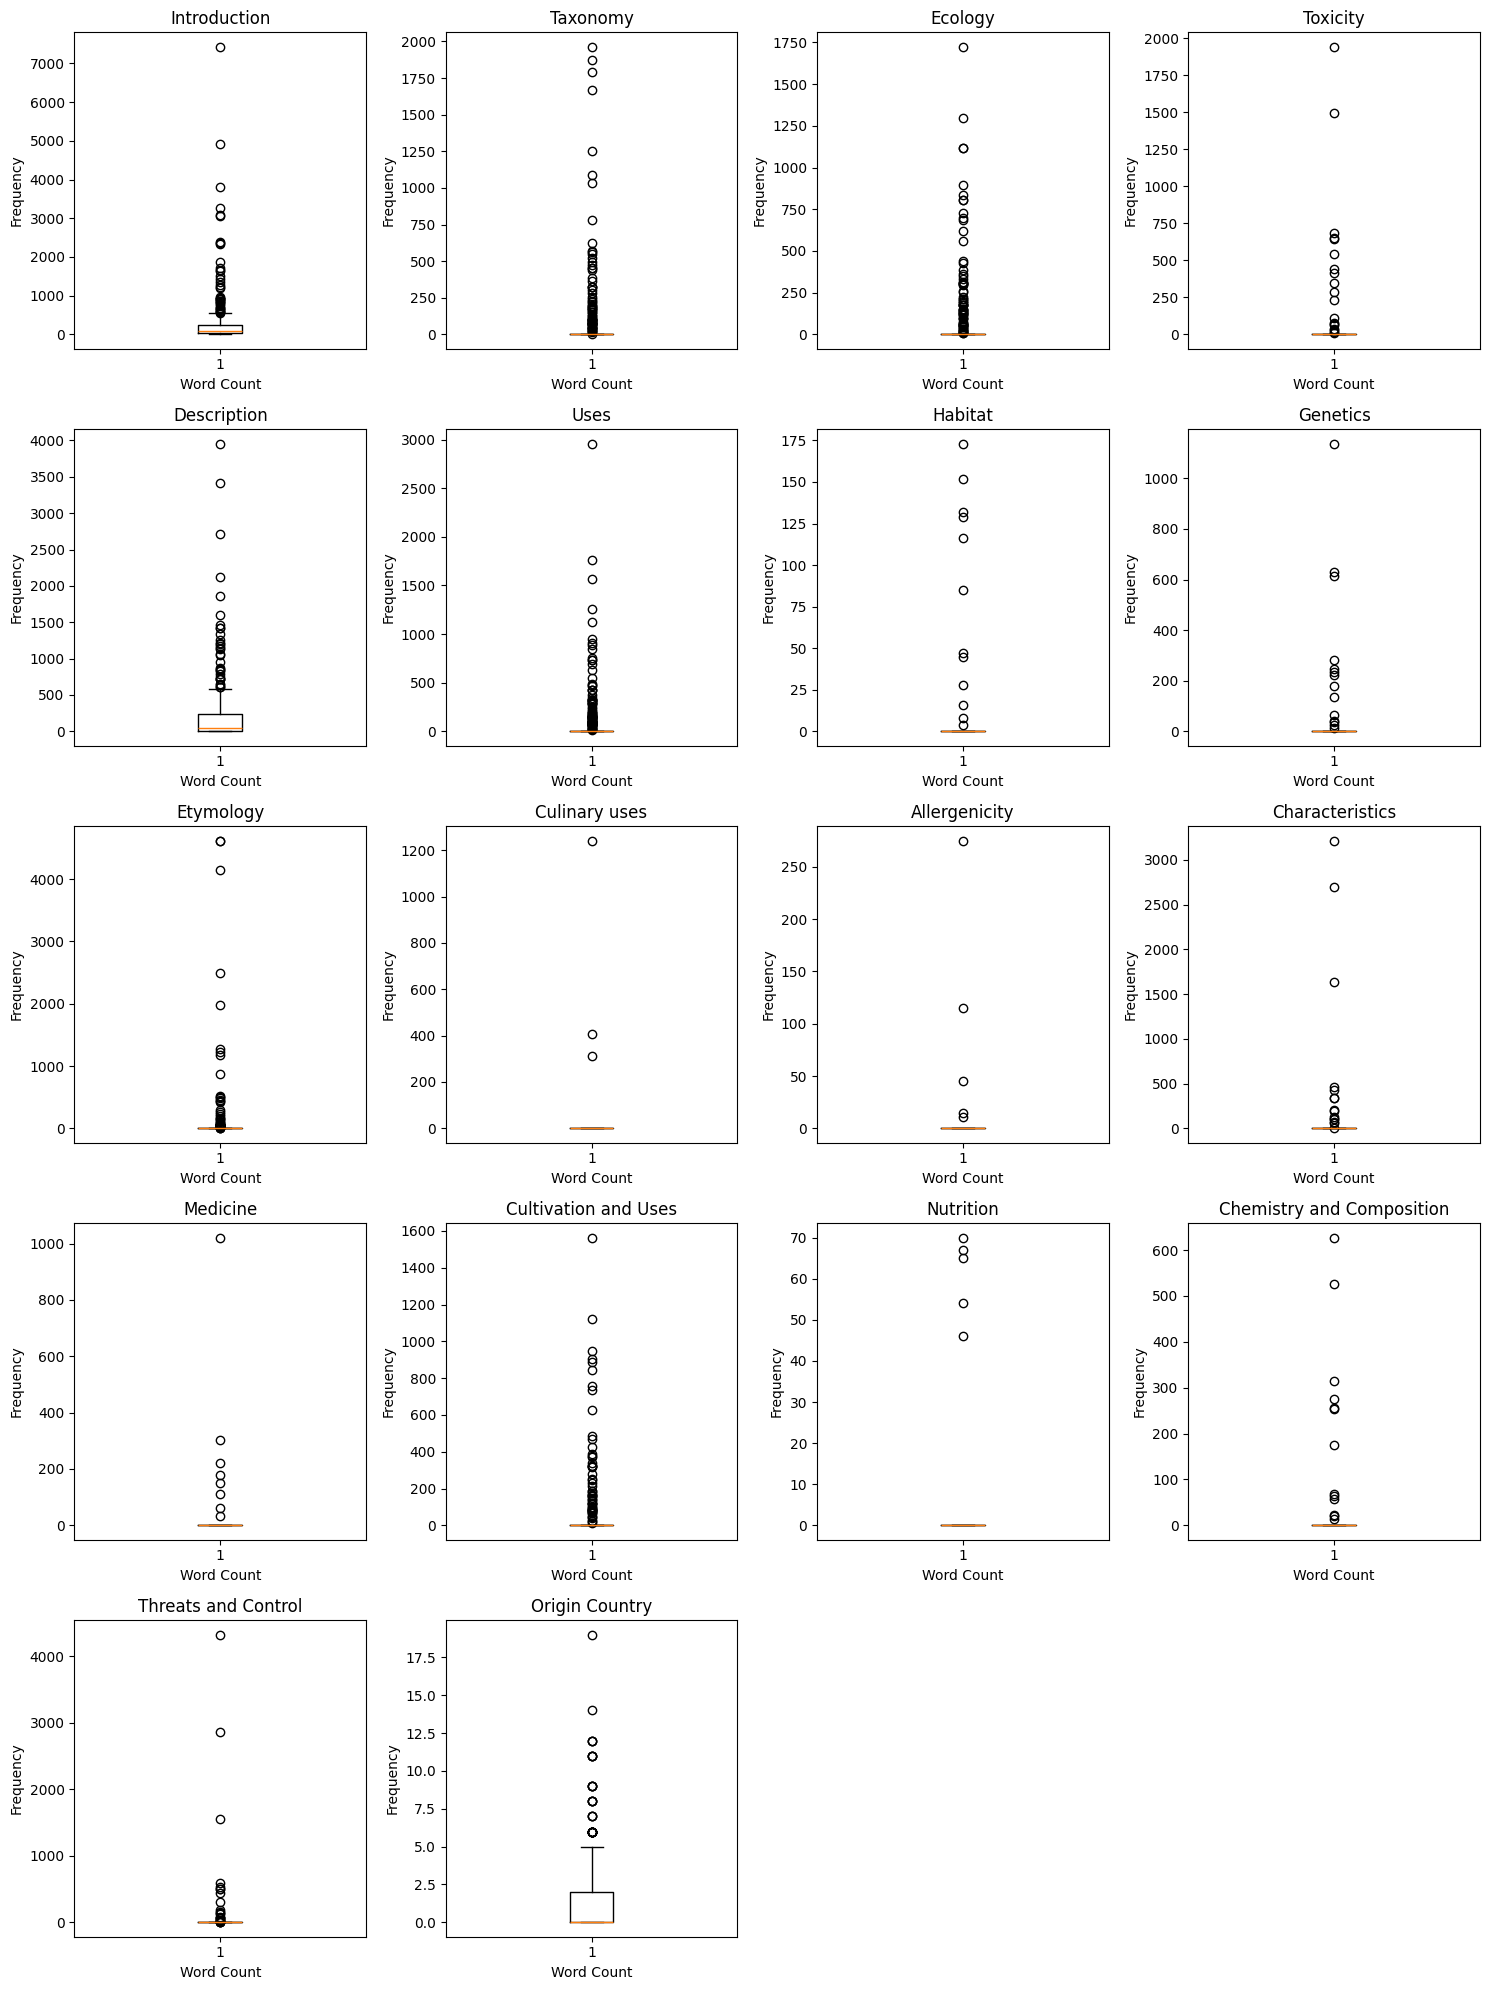

In [ ]:
# Set the number of columns in the grid layout
num_cols = 4  # Adjust the number of columns as needed
num_rows = (len(long_cols) + num_cols - 1) // num_cols

# Create a figure and an array of subplots
fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, 4 * num_rows))

# Flatten the axs array if it has more than 1 row
axs = axs.flatten()

# Plot for each column
for i, column in enumerate(long_cols):
    # Assuming column is the column with text data
    text_column = plants_df[column]
    
    # Tokenize the text into words and calculate word counts
    def count_words(text):
        if pd.notna(text):
            return len(text.split())
        else:
            return 0
    
    word_counts = text_column.apply(count_words)
    
    # Plot boxplot of word counts
    axs[i].boxplot(word_counts)
    axs[i].set_xlabel('Word Count')
    axs[i].set_ylabel('Frequency')
    axs[i].set_title(f'{column}')

# Hide any empty subplots
for i in range(len(long_cols), num_rows * num_cols):
    axs[i].axis('off')

# Adjust layout
plt.tight_layout()

# Specify the directory and file name
directory = '../img/'
file_name = f'BoxPlot_WC.png'

# Save the plot to the specified directory with the specified name
plt.savefig(f'{directory}/{file_name}')

# Display the plot
plt.show()


## Word Cloud

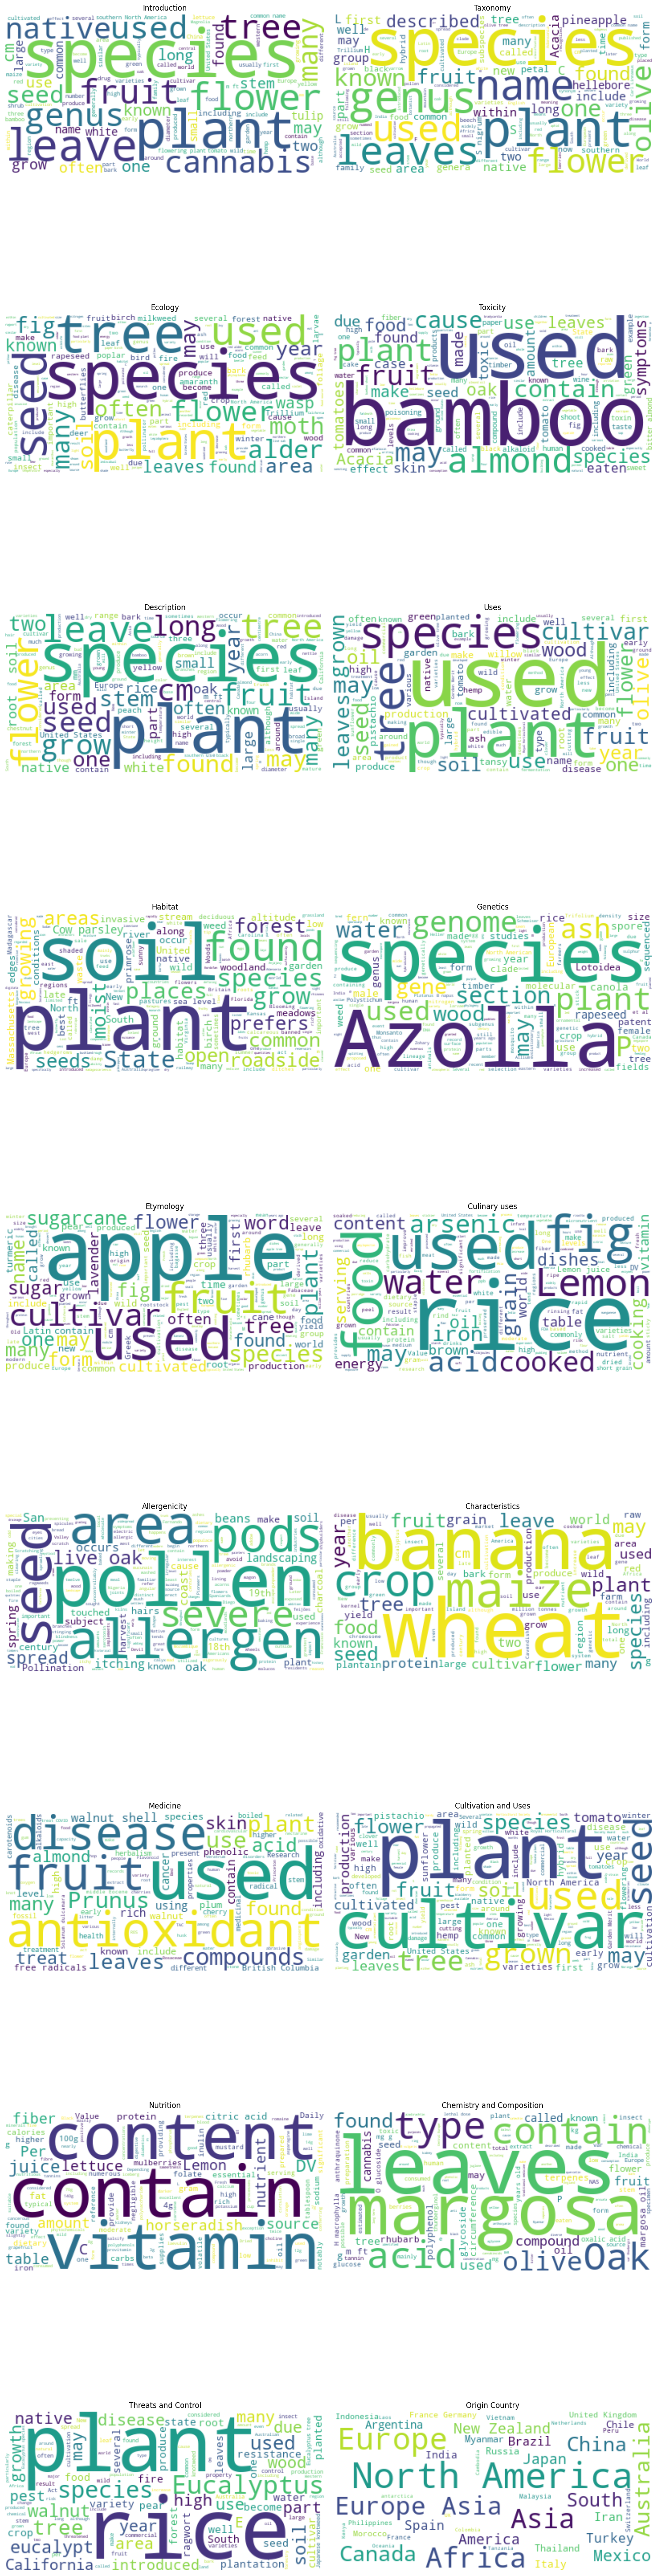

In [ ]:
# Set the number of columns in the grid layout
num_cols = 2  # Adjust the number of columns as needed
num_rows = (len(long_cols) + num_cols - 1) // num_cols

# Create a figure and an array of subplots
fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, 7 * num_rows))

# Flatten the axs array if it has more than 1 row
axs = axs.flatten()

# Generate word cloud for each column
for i, column in enumerate(long_cols):
    # Assuming column is the column with text data
    text_column = plants_df[column]
    
    # Combine all text into a single string
    combined_text = ' '.join(text_column.dropna())
    
    # Generate the word cloud
    wordcloud = WordCloud(width=400, height=200, background_color='white').generate(combined_text)
    
    # Display the word cloud using matplotlib
    axs[i].imshow(wordcloud, interpolation='bilinear')
    axs[i].axis('off')
    axs[i].set_title(f'{column}')

# Hide any empty subplots
for i in range(len(long_cols), num_rows * num_cols):
    axs[i].axis('off')

# Adjust layout
plt.tight_layout()

# Specify the directory and file name
directory = '../img/'
file_name = f'WC_total.png'

# Save the plot to the specified directory with the specified name
plt.savefig(f'{directory}/{file_name}')

# Display the plot
plt.show()


---

- *TODO*: need to see if this is important:

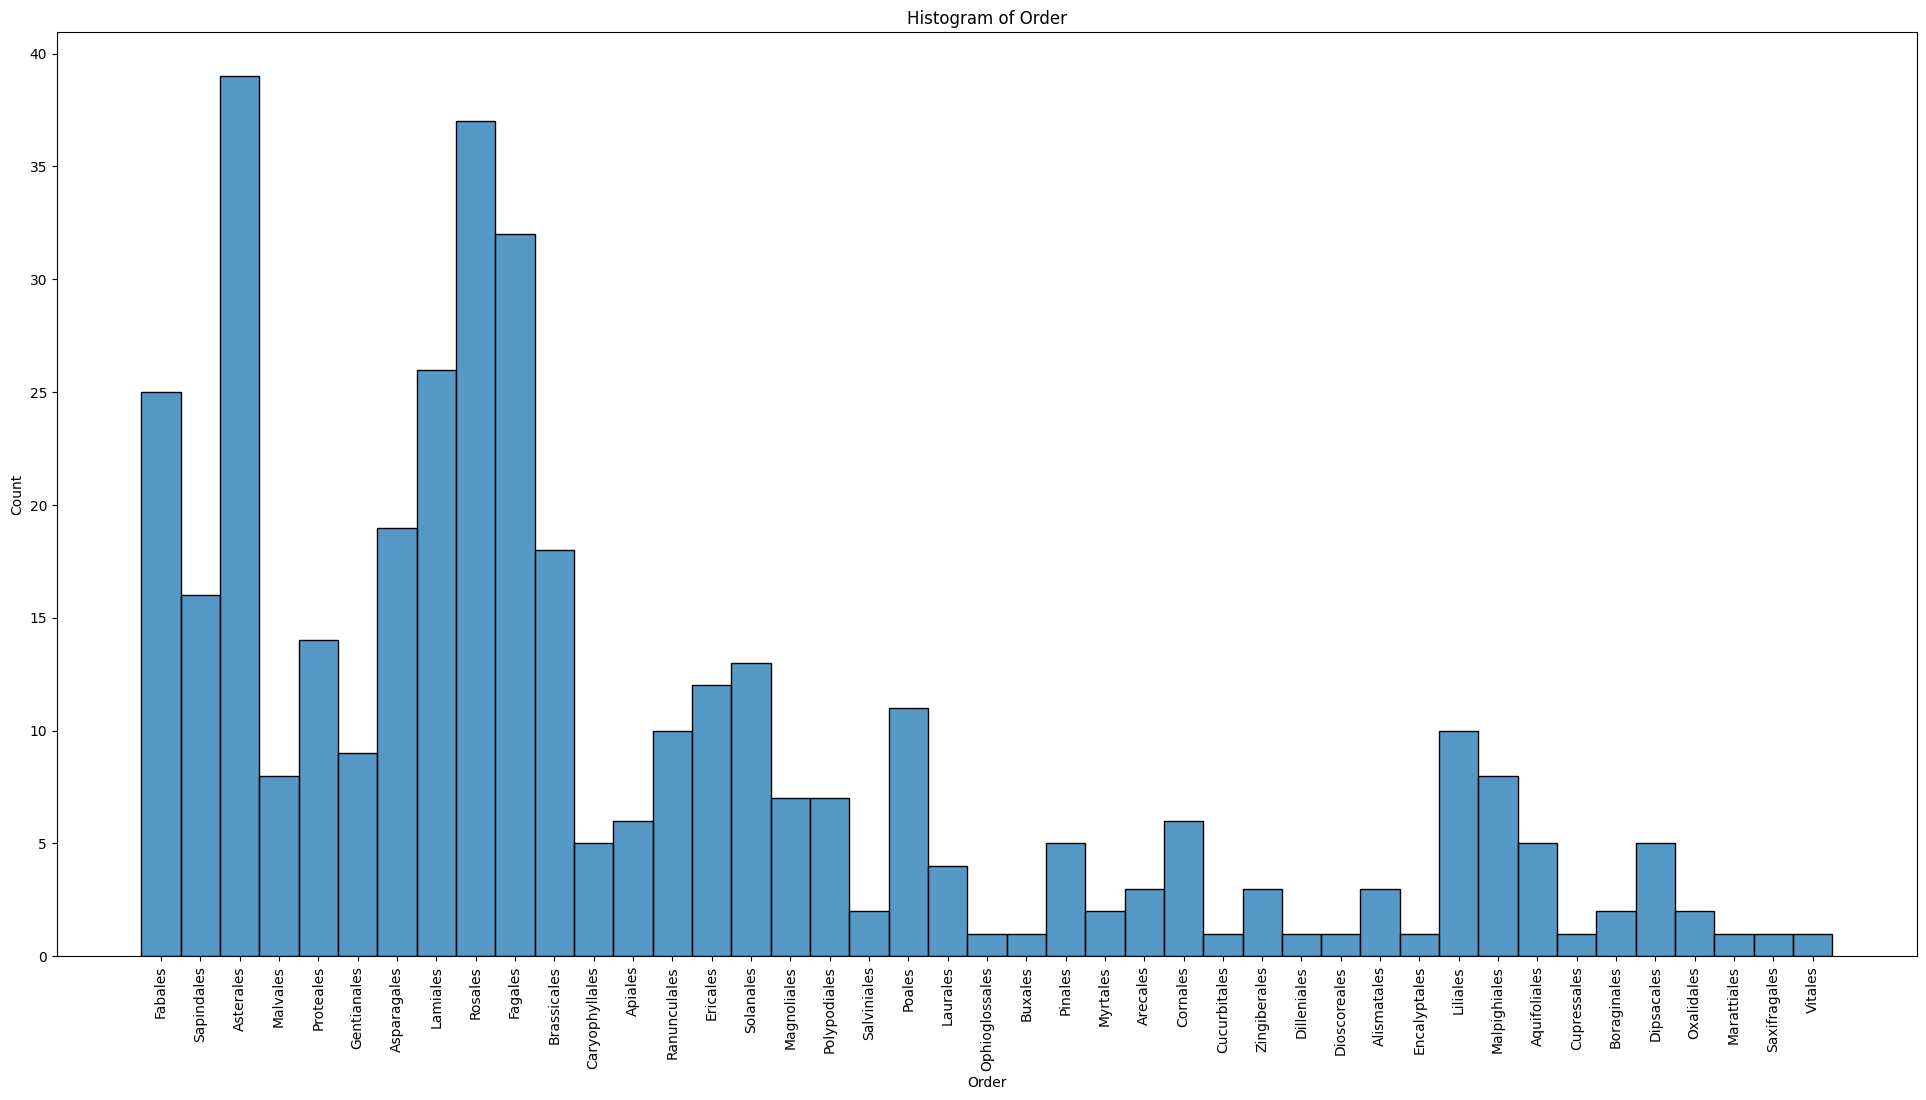

In [ ]:
# Histograms for Scientifc Classification
column = 'Order'

plt.figure(figsize=(24, 12))
sb.histplot(plants_df[column])
plt.title('Histogram of {}'.format(column))
plt.xticks(rotation="vertical")

# Specify the directory and file name
directory = '../img/'
file_name = f'H-{column}.png'

# Save the plot to the specified directory with the specified name
plt.savefig(f'{directory}/{file_name}')

plt.show()

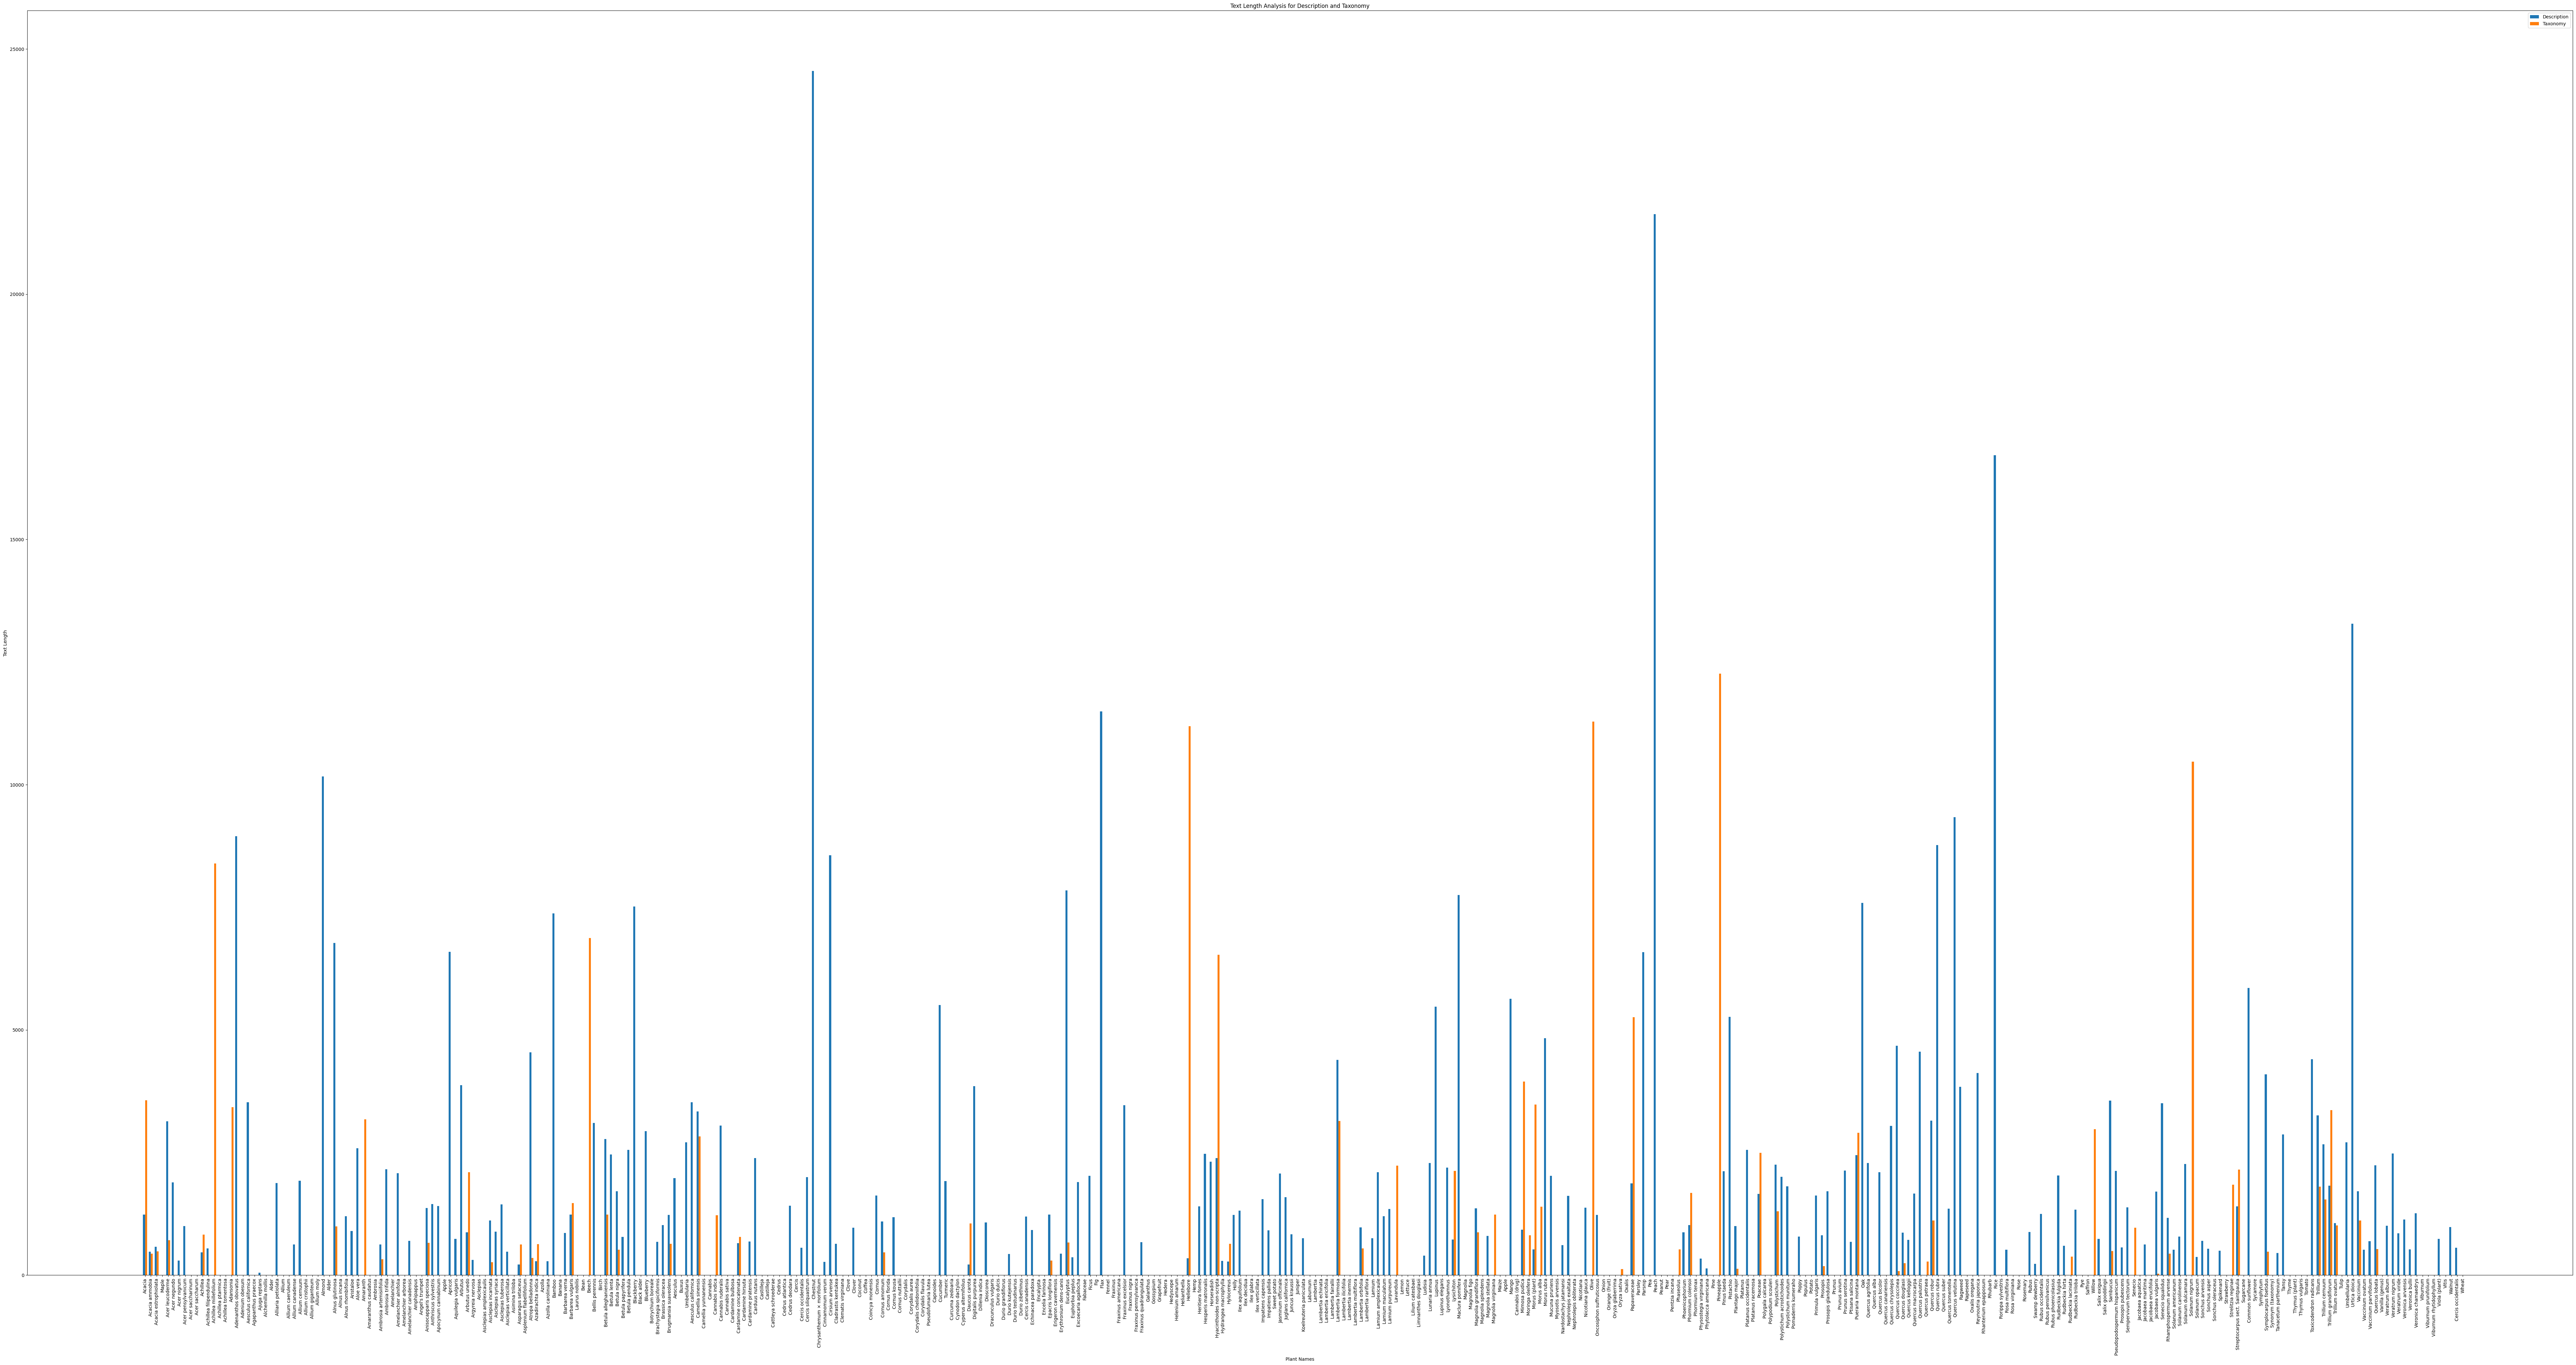

In [ ]:
# Compute the length of text in the 'Description' and 'Taxonomy' columns
plants_df['Description_Length'] = plants_df['Description'].str.len()
plants_df['Taxonomy_Length'] = plants_df['Taxonomy'].str.len()

# Visualization of text lengths
plt.figure(figsize=(100, 50))
bar_width = 0.35
index = range(len(plants_df['Name']))

plt.bar(index, plants_df['Description_Length'], label='Description', width=bar_width)
plt.bar([i + bar_width for i in index], plants_df['Taxonomy_Length'], label='Taxonomy', width=bar_width)

plt.xlabel('Plant Names')
plt.ylabel('Text Length')
plt.title('Text Length Analysis for Description and Taxonomy')
plt.xticks([i + bar_width/2 for i in index], plants_df['Name'])
plt.legend()
plt.xticks(rotation="vertical")
plt.show()


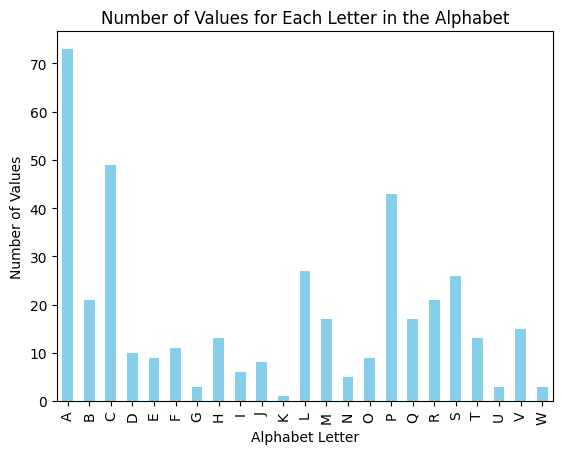

In [ ]:
# Create a new column 'FirstLetter' to store the first letter of each name
plants_df['FirstLetter'] = plants_df['Name'].str[0].str.upper()

# Count the occurrences of each letter
letter_counts = plants_df['FirstLetter'].value_counts().sort_index()

# Plot the bar chart
letter_counts.plot(kind='bar', color='skyblue')
plt.title('Number of Values for Each Letter in the Alphabet')
plt.xlabel('Alphabet Letter')
plt.ylabel('Number of Values')
plt.show()

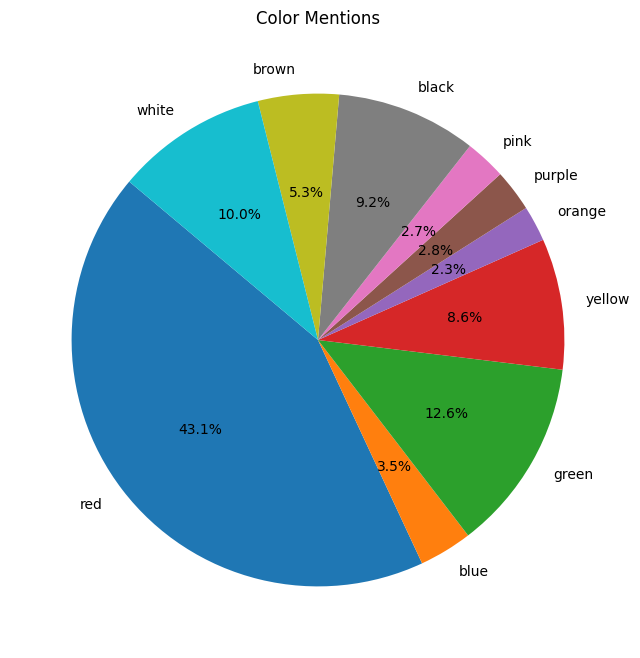

In [ ]:
# Find out how many times a color is mentioned in the dataframe

colors = ['red', 'blue', 'green', 'yellow', 'orange', 'purple', 'pink', 'black', 'brown', 'white']

# Concatenate all text columns into a single string
all_text = plants_df.apply(lambda x: ' '.join(x.dropna().astype(str)), axis=1)

# Convert text to lowercase for consistency
all_text = all_text.str.lower()

# Store color counts
color_counts = {}

# Loop through each color and count mentions in the concatenated text
for color in colors:
    color_counts[color] = all_text.str.count(color).sum()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(color_counts.values(), labels=color_counts.keys(), autopct='%1.1f%%', startangle=140)
plt.title('Color Mentions')


# Specify the directory and file name
directory = '../img/'
file_name = f'PC-Mentioned-Colors.png'

# Save the plot to the specified directory with the specified name
plt.savefig(f'{directory}/{file_name}')

plt.show()


In [ ]:
num_unique_values = plants_df['Species'].nunique()
print(f'Number of unique values: {num_unique_values}')


Number of unique values: 299


In [24]:

# Assuming your DataFrame is named plants_df
nan_counts = plants_df.isna().sum(axis=1)
sorted_plants_df = plants_df.iloc[nan_counts.argsort()]

# Getting the top 5 rows with the least NaN values
top_5_rows = sorted_plants_df.head(5)

top_5_rows

Name                                       Introduction  \
123              Clover  Clover, also called trefoil, are plants of the...   
290    Primula vulgaris  Primula vulgaris, the common primrose, is a sp...   
68   Azadirachta indica  Azadirachta indica, commonly known as margosa,...   
82         Betula nigra  Betula nigra, the black birch, river birch or ...   
274         Pinus taeda  Pinus taeda, commonly known as loblolly pine, ...   

     Kingdom   Division      Class          Clade      Clade_2   Clade_3  \
123  Plantae        NaN        NaN  Tracheophytes  Angiosperms  Eudicots   
290  Plantae        NaN        NaN  Tracheophytes  Angiosperms  Eudicots   
68   Plantae        NaN        NaN  Tracheophytes  Angiosperms  Eudicots   
82   Plantae        NaN        NaN  Tracheophytes  Angiosperms  Eudicots   
274  Plantae  Pinophyta  Pinopsida  Tracheophytes  Gymnosperms       NaN   

      Clade_4                        Clade_5  ...  \
123    Rosids  Inverted repeat-lacking clade  ...   
290  Asterids                            NaN  ...   
68     Rosids                            NaN  ...   
82     Rosids                            NaN  ...   
274       NaN                            NaN  ...   

                                              Genetics  \
123  The first extensive classification of Trifoliu...   
290                                                NaN   
68   Margosa genome and transcriptomes from various...   
82                                                 NaN   
274  Pines are the most common conifers and the gen...   

                                              Medicine Nutrition  \
123                                                NaN       NaN   
290                                                NaN       NaN   
68   In March 2020, claims were circulated on socia...       NaN   
82                                                 NaN       NaN   
274                                                NaN       NaN   

                             Chemistry and Composition Toxicity Allergenicity  \
123                                                NaN      NaN           NaN   
290                                                NaN      NaN           NaN   
68   Margosa fruit, seeds, leaves, stems, and bark ...      NaN           NaN   
82                                                 NaN      NaN           NaN   
274                                                NaN      NaN           NaN   

                                                  Uses Culinary uses  \
123  Clover is foraged by wildlife, including bears...           NaN   
290  Both flowers and leaves are edible, the flavou...           NaN   
68                                                 NaN           NaN   
82                                                 NaN           NaN   
274                                                NaN           NaN   

                                           Cultivation  \
123  Several species of clover are extensively cult...   
290  The wild primrose is a staple of cottage garde...   
68                                                 NaN   
82   While its native habitat is wet ground, it wil...   
274                                                NaN   

                              Threats and Control  
123                                           NaN  
290                                           NaN  
68                                            NaN  
82   It is listed as threatened in New Hampshire.  
274                                           NaN  

[5 rows x 36 columns]

In [25]:
plants_df[plants_df['Name'] == 'Clover'].isna().sum(axis=1).values[0]

18

In [29]:
plants_df[plants_df['Name'] == 'Betula nigra'].isna().sum(axis=1).values[0]

18

In [4]:
plants_df.columns[plants_df.notna().all()]

Index(['Name'], dtype='object')